In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# this allows me to see more rows so I can copy and paste df data
pd.set_option('display.max_rows', 500) 

In [5]:
pop_df = pd.read_csv(r'C:\DA12\Projects\capstone_refugees_da12\data\population_totals.csv', skiprows=14)

In [298]:
pop_df.iloc[0:20]

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
0,1951,Unknown,UNK,Australia,AUS,180000,0,0,-,0,0,0
1,1951,Unknown,UNK,Austria,AUT,282000,0,0,-,0,0,0
2,1951,Unknown,UNK,Belgium,BEL,55000,0,0,-,0,0,0
3,1951,Unknown,UNK,Canada,CAN,168511,0,0,-,0,0,0
4,1951,Unknown,UNK,Denmark,DNK,2000,0,0,-,0,0,0
5,1951,Unknown,UNK,France,FRA,290000,0,0,-,0,0,0
6,1951,Unknown,UNK,United Kingdom of Great Britain and Northern I...,GBR,208000,0,0,-,0,0,0
7,1951,Unknown,UNK,Germany,DEU,265000,0,0,-,0,0,0
8,1951,Unknown,UNK,Greece,GRC,18000,0,0,-,0,0,0
9,1951,Unknown,UNK,"China, Hong Kong SAR",HKG,30000,0,0,-,0,0,0


In [149]:
#pop_df.info()

In [248]:
# total refugees by country of origin for all years. This is what I copied over to Tableau 
count_origin = (
    pop_df.groupby('Country of origin')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:500] 
)
count_origin

,Country of origin,Refugees under UNHCR's mandate
0,Afghanistan,154402630
204,Unknown,94345652
185,Syrian Arab Rep.,63787855
91,Iraq,28897656
175,Somalia,25065193
65,Ethiopia,24508457
181,Sudan,22451952
177,South Sudan,19132212
4,Angola,17775243
53,Dem. Rep. of the Congo,16858541


In [250]:
# same thing but for countries of asylum. This is what I copied over to Tableau 
count_asylum = (
    pop_df.groupby('Country of asylum')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:500]
)
count_asylum

,Country of asylum,Refugees under UNHCR's mandate
131,Pakistan,82006466
83,Iran (Islamic Rep. of),78675611
69,Germany,40463645
183,United States of America,34396886
177,Türkiye,33193266
164,Sudan,26494742
50,Dem. Rep. of the Congo,26341554
178,Uganda,20380064
182,United Rep. of Tanzania,17063734
61,Ethiopia,17061232


In [288]:
# same thing but only for top 10 countries of origin
count_origin_top = (
    pop_df.groupby('Country of origin')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:10] 
)
count_origin_top

,Country of origin,Refugees under UNHCR's mandate
0,Afghanistan,154402630
204,Unknown,94345652
185,Syrian Arab Rep.,63787855
91,Iraq,28897656
175,Somalia,25065193
65,Ethiopia,24508457
181,Sudan,22451952
177,South Sudan,19132212
4,Angola,17775243
53,Dem. Rep. of the Congo,16858541


In [256]:
# same thing but only for top 10 countries of asylum
count_asylum_top = (
    pop_df.groupby('Country of asylum')["Refugees under UNHCR's mandate"].sum()
    .reset_index()
    .sort_values("Refugees under UNHCR's mandate", ascending=False)
    .iloc[0:10]
)
count_asylum_top

,Country of asylum,Refugees under UNHCR's mandate
131,Pakistan,82006466
83,Iran (Islamic Rep. of),78675611
69,Germany,40463645
183,United States of America,34396886
177,Türkiye,33193266
164,Sudan,26494742
50,Dem. Rep. of the Congo,26341554
178,Uganda,20380064
182,United Rep. of Tanzania,17063734
61,Ethiopia,17061232


In [290]:
# slicing pop_df to only include countries that exist in count_origin_top df
top_df_origin = pop_df[pop_df['Country of origin'].isin(count_origin_top['Country of origin'])]

# Group by year and country to get sum of refugees by country by year
df_grouped = top_df_origin.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum().reset_index()
#df_grouped

# Create pivot table with country as rows and year as columns
df_pivot = df_grouped.pivot(index='Year', columns='Country of origin', values='Refugees under UNHCR\'s mandate')
#df_pivot

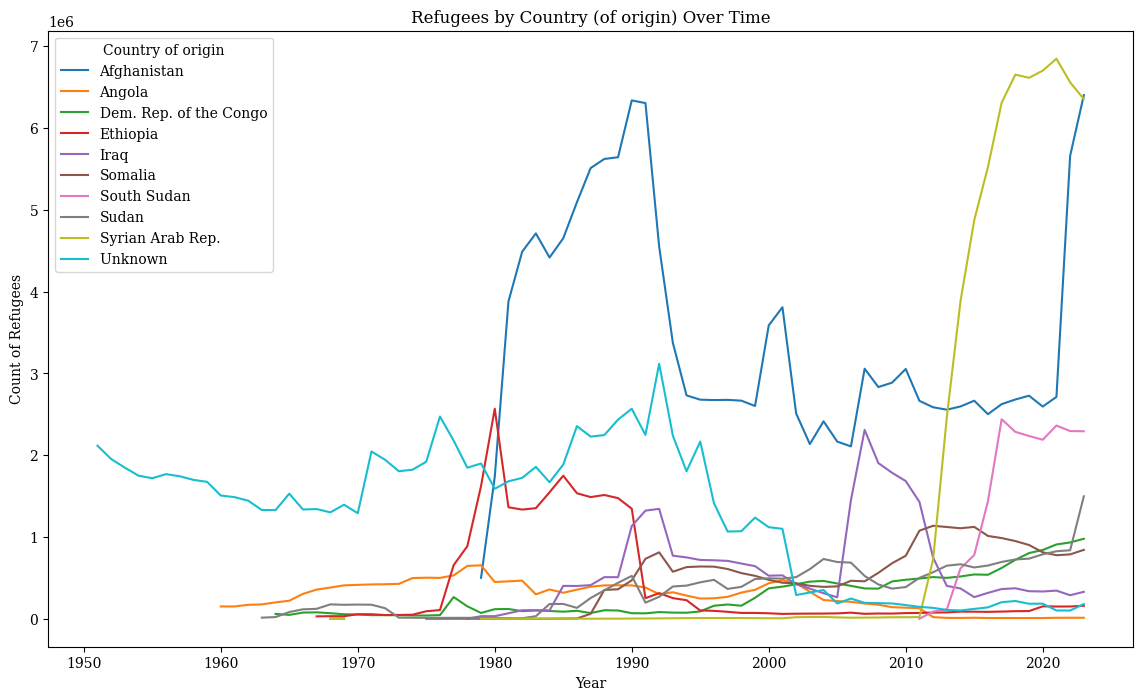

In [292]:
# Now plot this data
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='line', legend=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country (of origin) Over Time')
plt.show()

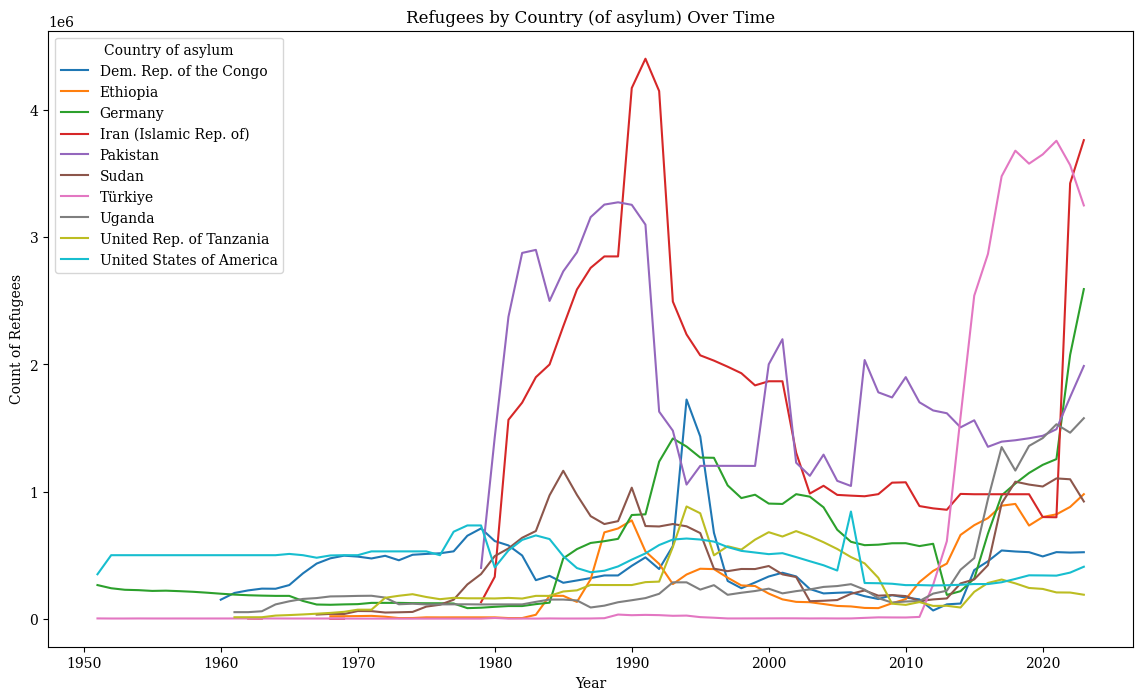

In [286]:
# do the same graph as above but for country of ASYLUM

# slicing pop_df to only include countries that exist in count_asylum_top df
top_df_asylum = pop_df[pop_df['Country of asylum'].isin(count_asylum_top['Country of asylum'])]

# Group by year and country to get sum of refugees by country by year
df_grouped = top_df_asylum.groupby(['Year', 'Country of asylum'])['Refugees under UNHCR\'s mandate'].sum().reset_index()

# Create pivot table with country as rows and year as columns
df_pivot = df_grouped.pivot(index='Year', columns='Country of asylum', values='Refugees under UNHCR\'s mandate')

# plotted
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='line', legend=True, ax=plt.gca())

plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country (of asylum) Over Time')
plt.show()

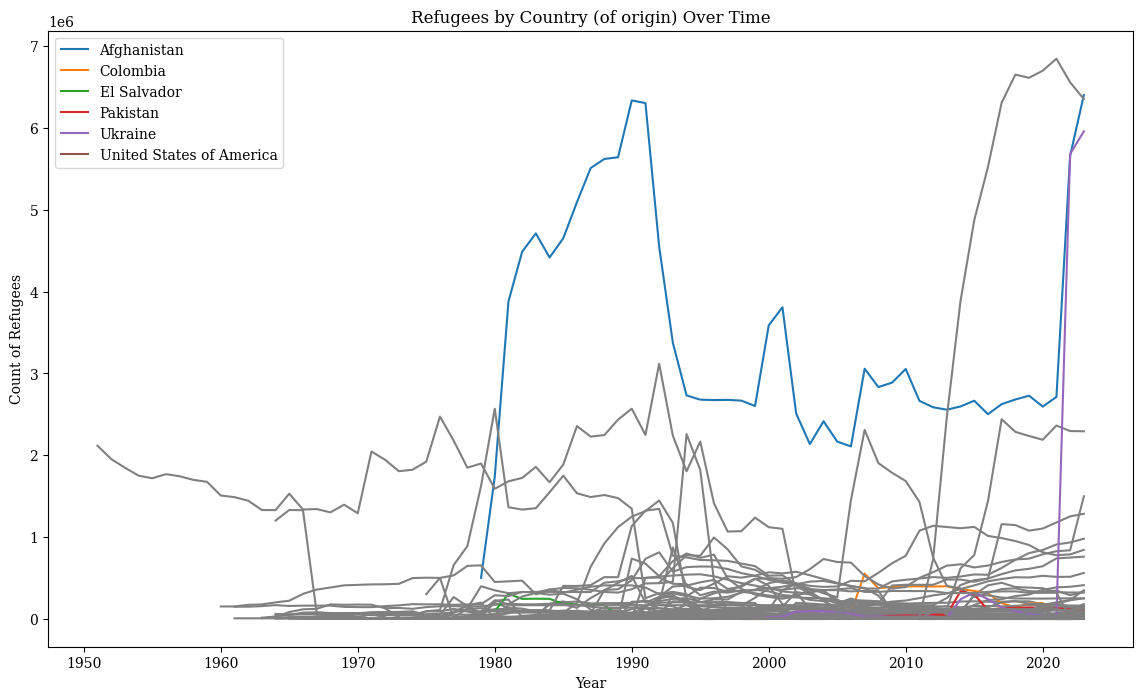

In [322]:
# ORIGIN graph but with ALL countries grey w/ selected ones highlighted 
highlight_countries = ['United States of America', 'Afghanistan', 'Iran', 'Pakistan', 'Syrian Arab Rep', 'Turkey', 'Ukraine', 'Colombia', 'El Salvador']

# Step 1: Define a color for each country (grey for others)
colors = ['grey' if country not in highlight_countries else None for country in df_pivot.columns]

# Step 2: Plot the data
plt.figure(figsize=(14, 8))

# Plot each country line with appropriate color
for i, country in enumerate(df_pivot.columns):
    if country in highlight_countries:
        df_pivot[country].plot(kind='line', ax=plt.gca(), label=country, legend=True)  # Default color for highlighted countries
    else:
        df_pivot[country].plot(kind='line', ax=plt.gca(), color='grey', label='_nolegend_')  # Grey for other countries

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Refugees by Country (of origin) Over Time')
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)  # Move legend outside the plot
plt.show()

In [183]:
# find countries with the highest number of refugees in a single year
(
    pop_df.groupby(['Year', 'Country of origin'])['Refugees under UNHCR\'s mandate'].sum()
    .reset_index()
    .sort_values('Refugees under UNHCR\'s mandate', ascending=False)
    .head(20)
)

,Year,Country of origin,Refugees under UNHCR's mandate
6802,2021,Syrian Arab Rep.,6848865
6599,2020,Syrian Arab Rep.,6702910
6197,2018,Syrian Arab Rep.,6654374
6397,2019,Syrian Arab Rep.,6615249
7007,2022,Syrian Arab Rep.,6559736
7035,2023,Afghanistan,6403144
7211,2023,Syrian Arab Rep.,6355788
1159,1990,Afghanistan,6339095
6000,2017,Syrian Arab Rep.,6310498
1254,1991,Afghanistan,6306301


In [211]:
# installed this on 10/1/24 and it said "Successfully installed pysankey-0.0.1" 
# pip install pysankey

In [ ]:
# imported sankey on 10/1/24
# from pySankey.sankey import sankey

In [216]:
# this isn't correct. Need just two columns. Not two tables..
#sankey(pop_df['Country of origin'], pop_df['Country of asylum'], aspect=20, fontsize=12)

In [240]:
# chat gpt
# Step 1: Filter relevant columns
df_filtered = pop_df[['Country of origin', 'Country of asylum', 'Refugees under UNHCR\'s mandate']]

# Step 2: Group the data to sum 'Refugees under UNHCR\'s mandate' for each pair of 'Country of origin' and 'Country of asylum'
df_grouped = df_filtered.groupby(['Country of origin', 'Country of asylum']).agg({'Refugees under UNHCR\'s mandate': 'sum'}).reset_index()
#df_grouped.head(20)


,Country of origin,Country of asylum,Refugees under UNHCR's mandate
0,Afghanistan,Afghanistan,0
1,Afghanistan,Albania,24
2,Afghanistan,Algeria,0
3,Afghanistan,Argentina,91
4,Afghanistan,Armenia,33
5,Afghanistan,Australia,191790
6,Afghanistan,Austria,387799
7,Afghanistan,Azerbaijan,12378
8,Afghanistan,Bahrain,250
9,Afghanistan,Bangladesh,5


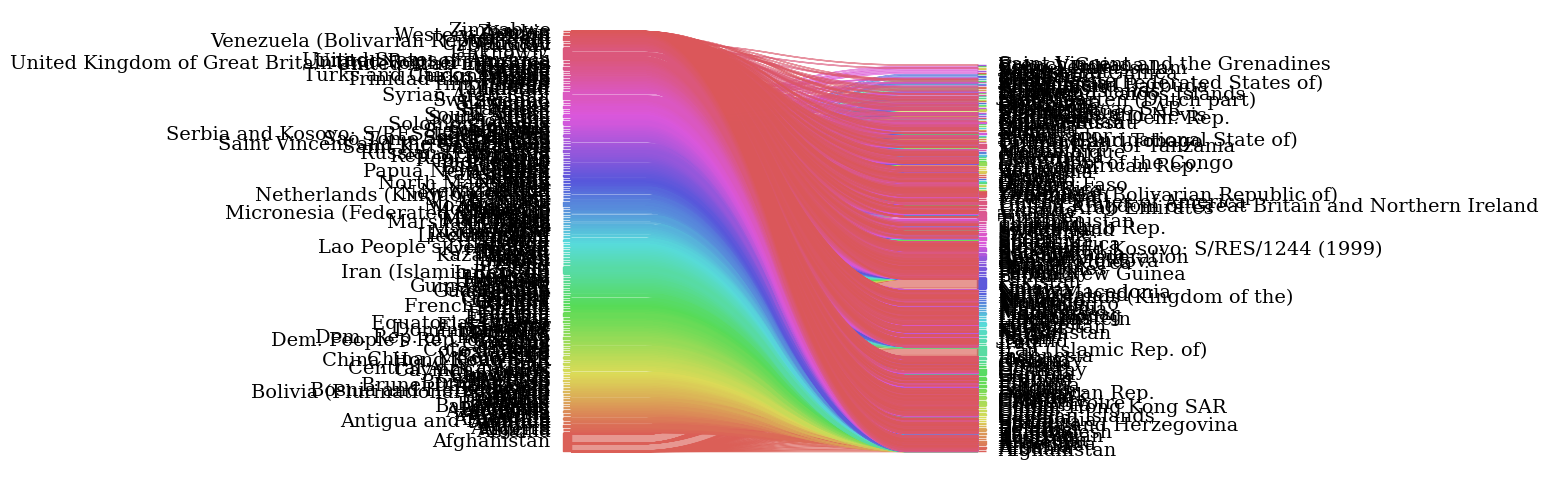

In [244]:
# THIS CODE WORKS! But it's wayyyyyyy to many countries to be legible 
sankey(
    left=df_grouped['Country of origin'],       # Left side: Country of origin
    right=df_grouped['Country of asylum'],      # Right side: Country of asylum
    leftWeight=df_grouped['Refugees under UNHCR\'s mandate'],  # Flow magnitude between the two (based on refugees)
    rightWeight=df_grouped['Refugees under UNHCR\'s mandate'] # Same as left weight to keep balance
)

# Step 4: Show the chart
plt.show()
